In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Clean_Dataset.csv')

In [2]:
df.head(15)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


# Exploration

- `Unnamed: 0` is not needed, so we will remove it.

- `airline` is relevant catagorical data, so we will encode it and keep it.

- `flight` is likely irrelvant to price, so we will remove it.

- `source_city` is relevant catagorical data, so we will encode it and keep it.

- `departure_time` is relevant catagorical data,  so we will encode it and keep it.

- `stops` is relevant catagorical data, so we will encode it and keep it.

- `arrival_time` is relevant catagorical data, so we will encode it and keep it.

- `destination_city` is relevant catagorical data, so we will encode it and keep it.

- `class` is relevant catagorical data, so we will encode it and keep it.

- `duration` is relevant numerical data, so we will keep it.

- `days_left` is relevant numerical data, so we will keep it

- `price` is the target variable.

In [3]:
# Droping parameters that we deem irrelevant
df = df.drop(columns=['Unnamed: 0', 'flight'])
df.head(15)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:

# Defining a function for counting the number of unique values in a column
def unique_counts(colunm_name):
    count = df[colunm_name].unique()
    print(f'There are {len(count)} unique values in the {colunm_name} column, they are: ', end ='')
    for i in count:
        print(i, end = ', ')
    print('\n')

unique_counts('airline')
unique_counts('source_city')
unique_counts('departure_time')
unique_counts('stops')
unique_counts('arrival_time')
unique_counts('destination_city')
unique_counts('class')


There are 6 unique values in the airline column, they are: SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India, 

There are 6 unique values in the source_city column, they are: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai, 

There are 6 unique values in the departure_time column, they are: Evening, Early_Morning, Morning, Afternoon, Night, Late_Night, 

There are 3 unique values in the stops column, they are: zero, one, two_or_more, 

There are 6 unique values in the arrival_time column, they are: Night, Morning, Early_Morning, Afternoon, Evening, Late_Night, 

There are 6 unique values in the destination_city column, they are: Mumbai, Bangalore, Kolkata, Hyderabad, Chennai, Delhi, 

There are 2 unique values in the class column, they are: Economy, Business, 



Because the number of **airlines**, **scource cities**, **departure times**, **arrival times** and **destination cities** is relatively small and have no obvious numerical interpretation, we will use ***one hot encoding*** on them.


For the **stops** field there is an obvious numerical interpretation and we will therefore turn it into a **numerically encoded feature** from 0-2.

Because the class field only has two unqique values we will turn them into a **binary encoded feature**.

**Duration** and **Days left** are already numerical as is our target variable **price**.

# Preprocessing

In [5]:
# Encoding class values to binary values
df['class'] = df['class'].map({'Business': 1, 'Economy': 0})

# Encoding stops values to numerical values
df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [6]:
# One hot encoding the airline feature
df_airline_one_hot = pd.get_dummies(df['airline'], prefix='airline', prefix_sep='_').astype(int)
df = df.join(df_airline_one_hot)
df = df.drop(columns=['airline'])

# One hot encoding the source city feature
df_source_city_one_hot = pd.get_dummies(df['source_city'], prefix='source_city', prefix_sep='_').astype(int)
df = df.join(df_source_city_one_hot)
df = df.drop(columns=['source_city'])

# One hot encoding the departure time feature
df_departure_time_one_hot = pd.get_dummies(df['departure_time'], prefix='departure_time', prefix_sep='_').astype(int)
df = df.join(df_departure_time_one_hot)
df = df.drop(columns=['departure_time'])

# One hot encoding the arrival time feature
df_arrival_time_one_hot = pd.get_dummies(df['arrival_time'], prefix='arrival_time', prefix_sep='_').astype(int)
df = df.join(df_arrival_time_one_hot)
df = df.drop(columns=['arrival_time'])

# One hot encoding the destination city feature
df_destination_city_one_hot = pd.get_dummies(df['destination_city'], prefix='destination_city', prefix_sep='_').astype(int)
df = df.join(df_destination_city_one_hot)
df = df.drop(columns=['destination_city'])

df


,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


All of our relevant variables are now either numerical or binary so we are ready to move on to training our model.

# Training Regression Model

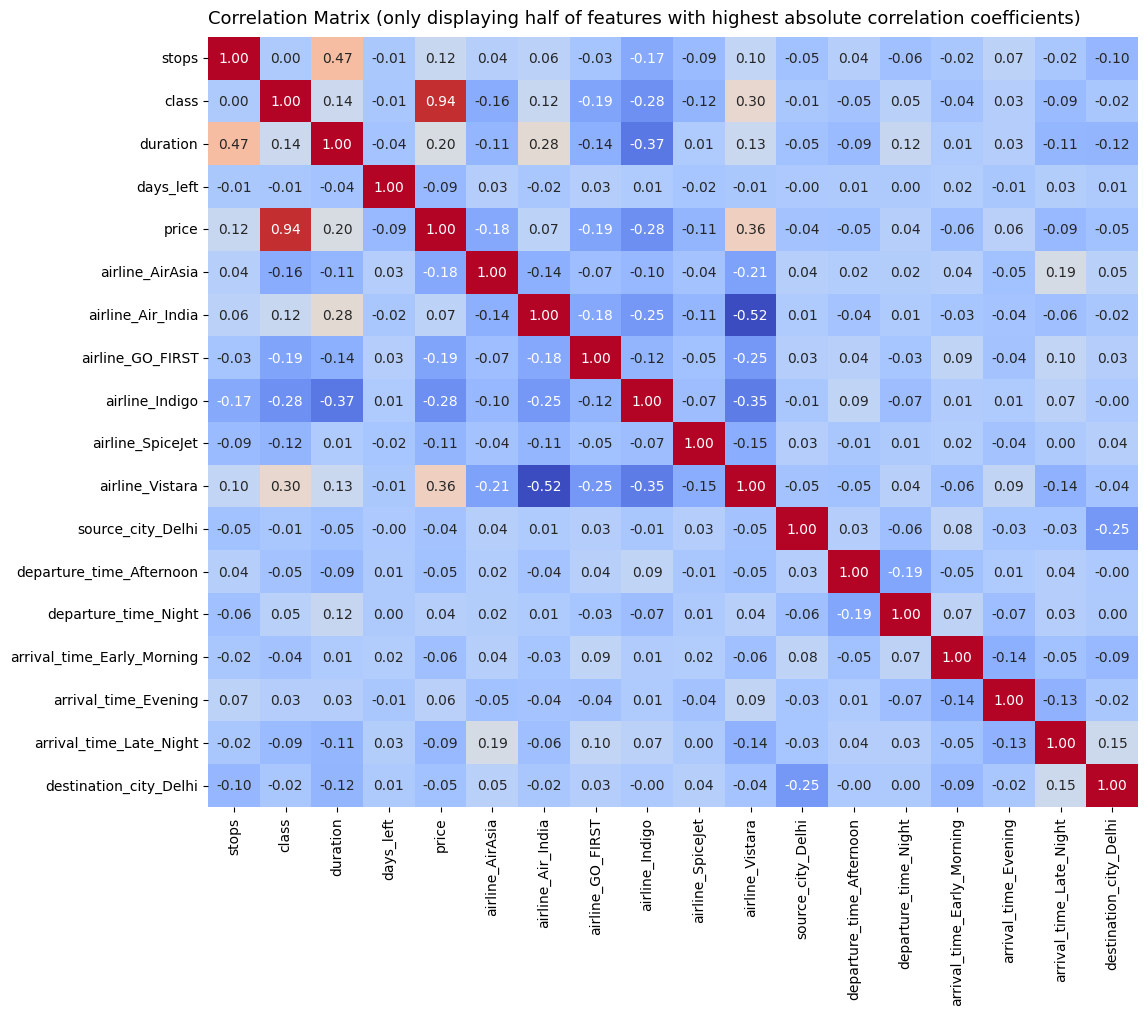

In [7]:
# Plotting the correlation matrix excluding half of the features with the lowest absolute correlation coefficients
correlations = df.corr()['price'].abs().sort_values()
num_columns_not_in_vis = int(0.5 * len(df.columns))
columns_to_drop = correlations.iloc[:num_columns_not_in_vis].index
df_reduced = df.drop(columns=columns_to_drop)

plt.figure(figsize=(12, 10))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title(f"Correlation Matrix (only displaying half of features with highest absolute correlation coefficients)", fontsize = 13, pad = 10, loc = 'left')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# We use random forest because our data set is relatively low dimensional and we have many binary features.

# Splitting the data into training and testing sets
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Fitting the model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# The score is the R^2 score (a value between 0 and 1 indicating how well the model fits the data)
print(f'R^2 score: {reg.score(X_test, y_test)}')

R^2 score: 0.9847332334601582


With 100 trees in our random forest we see a good fit (R^2 around 0.985) between predicted values and real values in the test data.

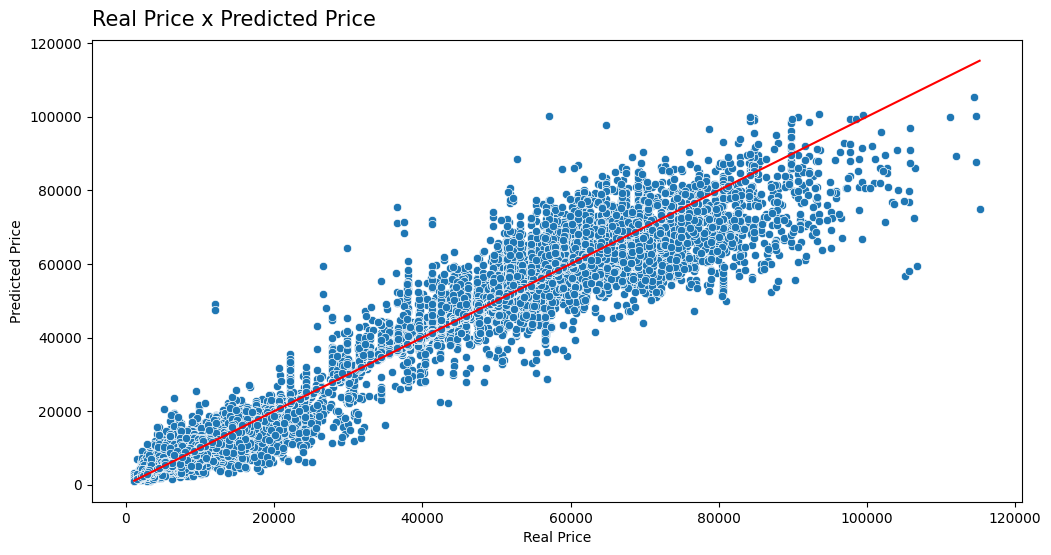

In [11]:
# Plotting the real price x predicted price

plt.figure(figsize = (12, 6))
sns.scatterplot(x = y_test, y = reg.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.title(f"Real Price x Predicted Price", fontsize = 15, pad = 10, loc = 'left')
plt.xlabel("Real Price", fontsize = 10)
plt.ylabel("Predicted Price", fontsize = 10)
plt.show()

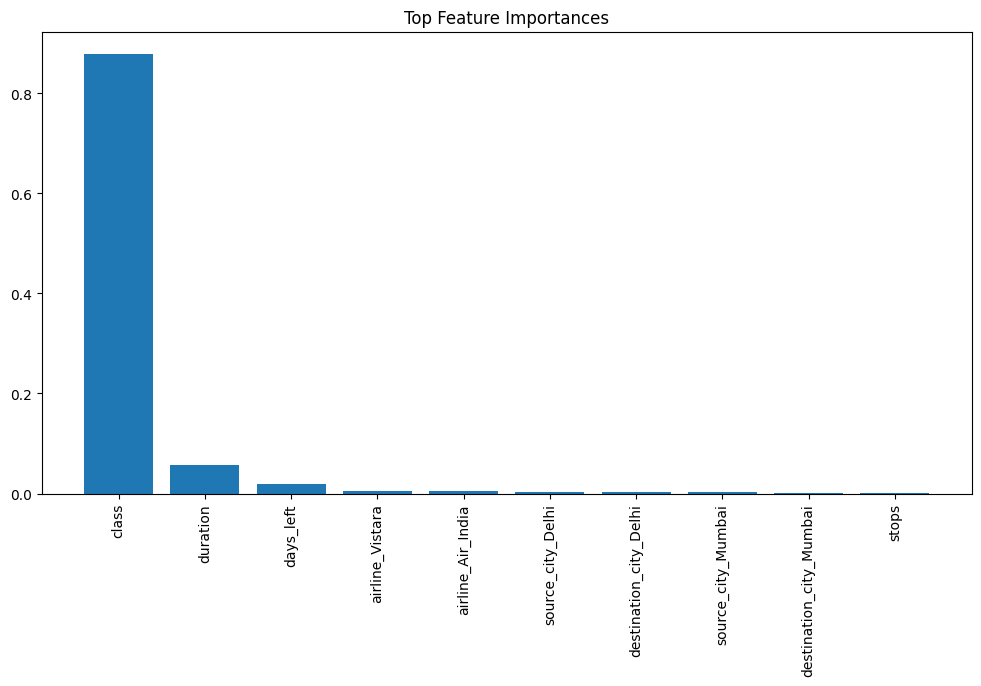

In [12]:
# Assume clf is your model and X_train is your training data
reg.fit(X_train, y_train)
importances = reg.feature_importances_

# Number of top features to display
num_features = 10

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names and importances so they match the sorted feature importances
top_indices = indices[:num_features]
top_importances = importances[top_indices]
top_names = [X_train.columns[i] for i in top_indices]

plt.figure(figsize=(12, 6))
plt.title("Top Feature Importances")
plt.bar(range(num_features), top_importances)
plt.xticks(range(num_features), top_names, rotation=90)
plt.show()